### INTRDUCTION

Lending Club (LC) offers an online platform to match borrowers seeking loans and lenders looking to invest. With lower operating costs than traditional lenders (banks), such online lending platforms leverage technology, data and analytics to provide faster and more convenient financing to individual and small business borrowers looking for attractive investment.

The purpose of this project is to develop a model of machine learning to predict the likelihood that a loan will be paid off. We will try to use data only accessible to investors via the listing of loans from the LendingClub, including borrower information. Such a predictive model could help investors in LendingClub make better-informed investment choices. We would only consider loans that have been approved by LendingClub under its credit subscription scheme.

**Importing libraries **

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset and Data Cleaning
Checking dataset shape and data types. We are trying to predict the loan_status column, so that is our target variable

In [3]:
df = pd.read_csv('C:/Users/vihar/Documents/Courses/Lending Club/data_lendingClub/lcData4m.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92624 entries, 0 to 92623
Columns: 150 entries, id to settlement_term
dtypes: float64(77), int64(48), object(25)
memory usage: 106.0+ MB


In [18]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'delinq_2yrs',
        'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
        'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
        'last_fico_range_high', 'last_fico_range_low',
        'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
        'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
        'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths',
        'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
        'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
        'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
        'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
        'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
        'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
        'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit

**Finding percentage of null or missing values in datasets.**

Features having more than 80% missing values are not useful in our analysis, hence we are droppping those features.
60 features are dropped and dataset size is now (92624 rows × 90 columns)

In [4]:
##Finding percentage of values that are missing in the dataframe.
null_df = pd.DataFrame({'Percent null value': 100*df.isnull().sum()/len(df)})

##printing columns with null percentage more than 0
null_df[null_df['Percent null value'] > 0] 

,Percent null value
id,100.000000
member_id,100.000000
emp_title,6.598722
emp_length,6.600881
url,100.000000
...,...
settlement_status,97.674469
settlement_date,97.674469
settlement_amount,97.674469
settlement_percentage,97.674469


In [5]:
df.dropna(axis=1, thresh=int(0.80*len(df)), inplace=True)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,7000,7000,7000,36 months,0.14,239.21,C,C4,facility operator,2 years,...,95.0,66.7,0,0,68213,59105,6000,61113,N,N
1,6000,6000,6000,36 months,0.14,205.04,C,C4,Team Lead,10+ years,...,100.0,40.0,0,0,117932,29181,19700,18962,N,N
2,4000,4000,4000,36 months,0.12,133.42,C,C1,Production Painter,1 year,...,63.6,100.0,0,0,38725,39380,9200,26325,N,N
3,12000,12000,12000,36 months,0.12,400.24,C,C1,Security Hospital Treatment Aide,10+ years,...,100.0,66.7,1,0,28224,14015,9200,11524,N,Y
4,2500,2500,2500,36 months,0.18,90.21,D,D5,Marketing Manager,5 years,...,100.0,60.0,0,0,52613,49340,11600,36513,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92619,17100,17100,17100,36 months,0.14,584.36,C,C4,BUS DRIVER,10+ years,...,96.9,25.0,1,0,39300,19466,10600,10800,N,N
92620,15000,15000,14975,36 months,0.14,512.60,C,C4,Member Relationship Specialist,10+ years,...,95.5,33.3,1,0,62083,3974,7300,183,N,N
92621,8000,8000,8000,36 months,0.08,250.29,A,A5,Owner,10+ years,...,88.5,20.0,0,9,220084,15196,13900,20534,N,N
92622,25000,25000,25000,36 months,0.17,885.73,D,D2,Director of Operations,3 years,...,100.0,100.0,0,0,491449,97581,33100,44504,N,N


In [86]:
## Checking columns which has null values

df.columns[df.isnull().any()]

Index(['emp_title', 'emp_length', 'revol_util', 'last_pymnt_d',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'num_tl_120dpd_2m',
       'percent_bc_gt_75'],
      dtype='object')

In [23]:
# Target feature is loan_status, hence we are checking if there are any columns where loan_status value is null. If yes, we can drop those rows

null_rows = df[df['loan_status'].isnull()]
null_rows

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag


Let's list our features in slices to see what we actually need. This step will involve dropping of useless features and modifying/changing other features to make them apt for model building.

In [29]:
df.iloc[:5, : 30]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util
0,7000,7000,7000,36 months,0.14,239.21,C,C4,facility operator,2 years,...,21.62,1,11-Sep,660,664,0,8,0,5695,80.20%
1,6000,6000,6000,36 months,0.14,205.04,C,C4,Team Lead,10+ years,...,25.28,0,9-Nov,685,689,1,10,0,12113,51.10%
2,4000,4000,4000,36 months,0.12,133.42,C,C1,Production Painter,1 year,...,38.73,7,5-Jul,660,664,0,14,0,8339,67.20%
3,12000,12000,12000,36 months,0.12,400.24,C,C1,Security Hospital Treatment Aide,10+ years,...,9.69,0,6-May,665,669,0,12,1,8105,48.50%
4,2500,2500,2500,36 months,0.18,90.21,D,D5,Marketing Manager,5 years,...,20.38,0,5-Oct,675,679,1,11,0,13117,81.50%


In [30]:
df.iloc[:5, 30: 60]

,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct
0,20,f,0,0,2937.50000,2937.50,1523.26,874.19,0.0,540.05,...,0,59105,7100,8,7388,305.0,94.9,0,0,46.0
1,17,f,0,0,3913.07000,3913.07,2368.19,731.89,0.0,812.99,...,0,103108,23700,5,10311,8216.0,58.3,0,0,56.0
2,23,f,0,0,581.02000,581.02,0.00,0.00,0.0,581.02,...,0,39380,12400,2,3282,861.0,90.6,0,0,120.0
3,16,f,0,0,12880.77000,12880.77,9309.82,2288.95,0.0,1282.00,...,0,14015,16700,7,1274,2572.0,72.0,0,0,112.0
4,30,f,0,0,3122.87703,3122.88,2500.00,622.88,0.0,0.00,...,0,49340,16100,2,4485,1396.0,88.0,0,0,115.0


In [31]:
df.iloc[:5, 60:]

,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,48,15,5,0,23.0,12.0,0,2,2,3,...,95.0,66.7,0,0,68213,59105,6000,61113,N,N
1,70,9,9,1,9.0,2.0,0,3,5,5,...,100.0,40.0,0,0,117932,29181,19700,18962,N,N
2,122,21,21,0,73.0,NaN,6,2,2,2,...,63.6,100.0,0,0,38725,39380,9200,26325,N,N
3,87,12,12,0,13.0,11.0,0,3,6,3,...,100.0,66.7,1,0,28224,14015,9200,11524,N,Y
4,119,34,9,0,62.0,2.0,0,4,6,5,...,100.0,60.0,0,0,52613,49340,11600,36513,N,N


After looking into above feature details carefully, we came to a coclusion that below feature data will not be present while lending the loan. So we do not need them for our predictions:

    'revol_util','acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim'

In [6]:
# Dropping these variables as these data are not present when lending the loan. Thus these features do not have any importance in making prediction

df.drop(columns=['revol_util','acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim'], inplace=True,axis=1)

In [33]:
## Checking columns which has null values

df.columns[df.isnull().any()]

Index(['emp_title', 'emp_length', 'mo_sin_old_il_acct'], dtype='object')

We still have 3 features in our dataset which has null values. To treat them, we will impute null values for 'mo_sin_old_il_acct' with it's mean. We will treat 'emp_title' and 'emp_length' after further analysis as they are categorical features and cannot be imputed with median or mean values.

In [7]:
#Imputing null values for 'mo_sin_old_il_acct' with it's mean. 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['mo_sin_old_il_acct']])
df['mo_sin_old_il_acct'] = imputer.transform(df[['mo_sin_old_il_acct']])

## # Exploratory Data Analysis

#### Analysing categorical features and converting them into numerical if necessary

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92624 entries, 0 to 92623
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             92624 non-null  int64  
 1   term                  92624 non-null  object 
 2   int_rate              92624 non-null  float64
 3   installment           92624 non-null  float64
 4   grade                 92624 non-null  object 
 5   sub_grade             92624 non-null  object 
 6   emp_title             86512 non-null  object 
 7   emp_length            86510 non-null  object 
 8   home_ownership        92624 non-null  object 
 9   annual_inc            92624 non-null  float64
 10  verification_status   92624 non-null  object 
 11  issue_d               92624 non-null  object 
 12  loan_status           92624 non-null  object 
 13  purpose               92624 non-null  object 
 14  title                 92624 non-null  object 
 15  zip_code           

We still have 16 categorical features in our dataset which needs to be removed or modified before creating models. Let us check one by one.

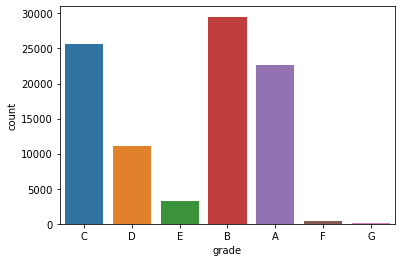

In [8]:
sns.countplot('grade',data=df)

**sub-grade vs. loan_status

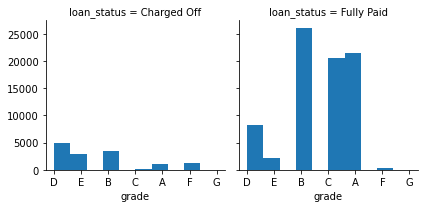

In [90]:
grade_loan = df.loc[:, ['grade', 'loan_status']]

g = sns.FacetGrid(grade_loan, col = "loan_status")
g = g.map(plt.hist, "grade")

People with high grade will be able to borrow at a lower interest rate. Vice versa.

We could observe that majority of people who fully paid off the loan are those who are graded A, B and C. However, those whose debt has been charged off are less likely to be grade A or B customer. Instead B, C and E seem more common.

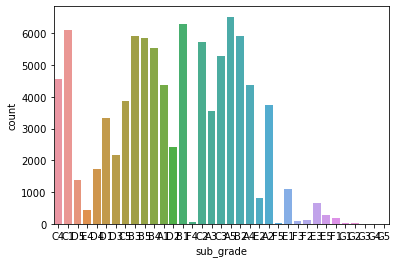

In [40]:
sns.countplot('sub_grade',data=df)

In [9]:
#Can drop grade as grade is implied by sub_grade

df.drop('grade', axis=1, inplace=True)

In [126]:
df['emp_title'].value_counts()

Teacher                                  1897
Manager                                  1520
Owner                                     870
Registered Nurse                          717
RN                                        712
                                         ... 
Manager In Training                         1
Requirements Officer                        1
Operations Communications Coordinator       1
ITA3 Disaster Recovery Planner              1
Mail assistant                              1
Name: emp_title, Length: 33173, dtype: int64

In [10]:
#There are too many different job titles for this feature, so we drop it.

df.drop(labels='emp_title', axis=1, inplace=True)

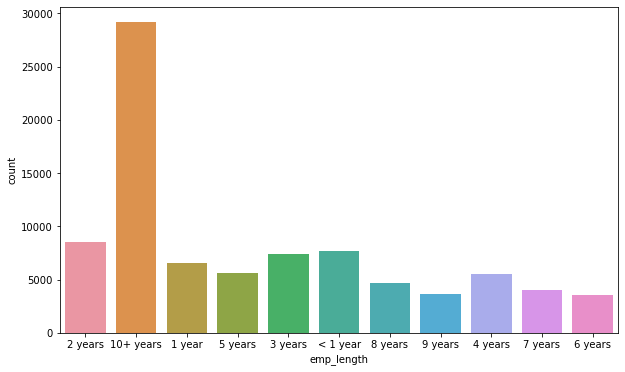

In [11]:
plt.figure(figsize=(10,6))
sns.countplot('emp_length',data=df,)

In [12]:
# Converting emp_length to integer

df['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df['emp_length'].replace('< 1 year', '0 years', inplace=True)

def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
    
df['emp_length'] = df['emp_length'].apply(emp_length_to_int)
df['emp_length'].value_counts(dropna=False).sort_index()

0.0      7703
1.0      6598
2.0      8504
3.0      7448
4.0      5536
5.0      5642
6.0      3571
7.0      4007
8.0      4711
9.0      3629
10.0    29161
NaN      6114
Name: emp_length, dtype: int64

In [13]:
# 'emp_length' containg missing value in rows, so we impute the missing values with it's mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['emp_length']])
df['emp_length'] = imputer.transform(df[['emp_length']])

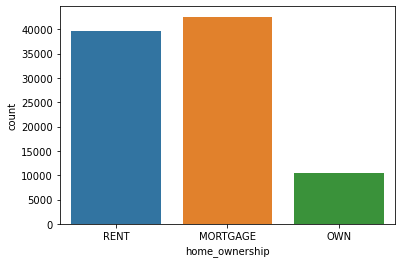

In [131]:
sns.countplot('home_ownership',data=df)

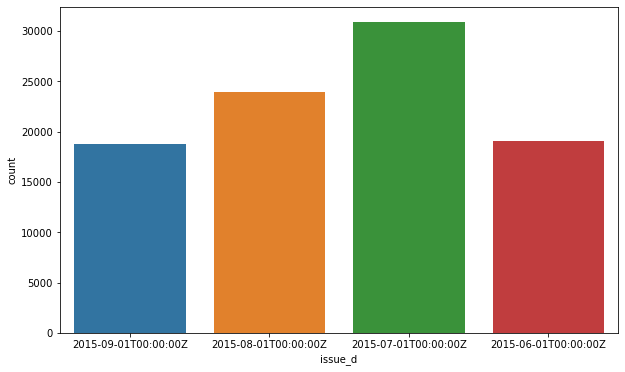

In [132]:
plt.figure(figsize=(10,6))
sns.countplot('issue_d',data=df)

In [14]:
# issue_d can be dropped

df.drop(labels='issue_d', axis=1, inplace=True)

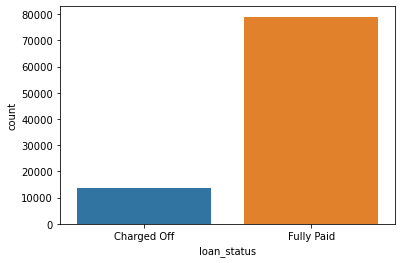

In [134]:
#Check if our target is balanced or not
sns.countplot('loan_status',data=df)

In [61]:
df['purpose'].value_counts()

debt_consolidation    52311
credit_card           23407
home_improvement       5820
other                  4736
major_purchase         1782
medical                 979
car                     925
vacation                777
moving                  750
small_business          739
house                   337
renewable_energy         60
wedding                   1
Name: purpose, dtype: int64

In [62]:
df['title'].value_counts()

Debt consolidation         52313
Credit card refinancing    23424
Home improvement            5820
Other                       4725
Major purchase              1778
Medical expenses             976
Car financing                925
Vacation                     776
Moving and relocation        752
Business                     739
Home buying                  337
Green loan                    59
Name: title, dtype: int64

In [24]:
df.drop('title', axis=1, inplace=True)

In [64]:
df['zip_code'].value_counts()

945xx    1067
112xx    1034
606xx     976
750xx     956
300xx     883
         ... 
892xx       1
837xx       1
094xx       1
965xx       1
861xx       1
Name: zip_code, Length: 874, dtype: int64

In [15]:
# There are too many zip code. So let's just drop it

df.drop(labels='zip_code', axis=1, inplace=True)

In [66]:
df['addr_state'].value_counts()

CA    13707
NY     7728
TX     7723
FL     6772
IL     3893
NJ     3421
GA     3056
OH     3046
PA     3008
MI     2577
VA     2435
NC     2405
MA     2235
AZ     2186
MD     2145
CO     1931
WA     1879
MN     1623
CT     1456
IN     1445
MO     1401
NV     1384
TN     1366
WI     1224
LA     1114
AL     1092
OR     1034
SC     1033
OK      839
KY      838
KS      776
AR      695
UT      549
MS      541
NM      507
NH      450
RI      436
HI      403
WV      396
NE      340
DE      281
MT      237
DC      204
VT      196
WY      191
AK      186
SD      175
ND       45
ME       20
Name: addr_state, dtype: int64

In [67]:
df['earliest_cr_line'].value_counts()

3-Sep     704
2-Aug     696
1-Aug     680
2-Sep     663
4-Sep     642
         ... 
Oct-58      1
Aug-60      1
May-62      1
Jun-64      1
Mar-66      1
Name: earliest_cr_line, Length: 614, dtype: int64

In [16]:
df.drop(labels='earliest_cr_line', axis=1, inplace=True)

In [72]:
df['initial_list_status'].value_counts()

w    54672
f    37952
Name: initial_list_status, dtype: int64

In [73]:
df['application_type'].value_counts()

Individual    92624
Name: application_type, dtype: int64

From above data analysis, we are converting below features into dummies to convert it into numerical and drop the first one to avoid correlation

In [17]:
df = pd.get_dummies(df, columns=['verification_status','term','sub_grade', 'home_ownership', 'purpose', 'addr_state', 'initial_list_status', 'application_type'], drop_first=True)

In [75]:
df.shape 

(92624, 117)

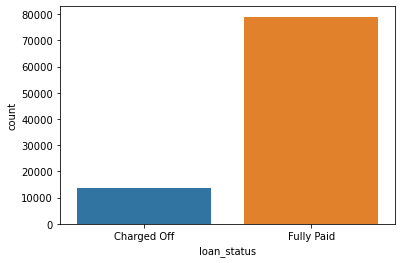

In [18]:
#Check if our target is balanced or not
sns.countplot('loan_status',data=df)

We can see that the distribution of target feature is not balanced where 'Fully-Paid' is almost 80% of loan status. We may want to oversample on 'Charged off' later before training our model. Also, we would choose AUC , precision and recall over accuracy when it comes to the model performance evaluation.

In [19]:
# Converting into binary feature

df['loan_status'] = [1 if l=='Fully Paid' else 0 for l in df.loan_status]
 
df['loan_status'].value_counts()

1    78972
0    13652
Name: loan_status, dtype: int64

**loan_amnt

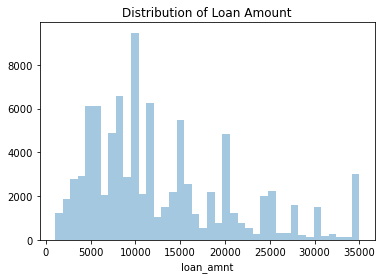

In [20]:
sns.distplot(df['loan_amnt'], kde = False, bins = 40).set_title('Distribution of Loan Amount')
plt.show()

The loan amount distribution is right skewed with the greatest amount around to 40k. Most of loans lie in between 5k and 20k.

### Split data into test and train set and then perform resampling of target feature

In [25]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
# Dataset split into train and test
from sklearn.model_selection import train_test_split

y=df['loan_status']
X=df.drop(['loan_status'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [27]:
# Oversampling

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, sampling_strategy=0.6)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#### Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train_res,y_train_res)
predictions=decisiontree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Accuracy: 0.7521592054124082
              precision    recall  f1-score   support

           0       0.21      0.23      0.22      4176
           1       0.86      0.85      0.85     23612

    accuracy                           0.75     27788
   macro avg       0.53      0.54      0.53     27788
weighted avg       0.76      0.75      0.76     27788

[[  946  3230]
 [ 3657 19955]]


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600)
rf.fit(x_train_res,y_train_res)
predictions = rf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Accuracy: 0.8468043759896358
              precision    recall  f1-score   support

           0       0.35      0.02      0.04      4176
           1       0.85      0.99      0.92     23612

    accuracy                           0.85     27788
   macro avg       0.60      0.51      0.48     27788
weighted avg       0.78      0.85      0.79     27788

[[   93  4083]
 [  174 23438]]


In [30]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train_res.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
int_rate,1.014125e-01
emp_length,5.257710e-02
dti,4.028860e-02
fico_range_high,4.024530e-02
fico_range_low,4.023668e-02
...,...
addr_state_ME,1.482461e-05
sub_grade_G3,9.251436e-06
sub_grade_G5,3.081085e-06
purpose_wedding,7.387082e-07


### K Nearest Neighbour

In [31]:
##Normalizing the input features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler.fit_transform(x_train_res)
x_trainK = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_testK = pd.DataFrame(x_test_scaled)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error 
from math import sqrt

error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_trainK, y_train_res)
    pred_i = knn.predict(X_testK)
    error_rate.append(np.mean(pred_i != y_test))

In [33]:
error_rate

[0.25467827839355117,
 0.34410536922412555,
 0.22682452857348495,
 0.2764142795451274,
 0.2243414423492155,
 0.2602922124658126,
 0.2268965020872319,
 0.25568590758600834,
 0.23279833021448107,
 0.25870879516337986,
 0.23902403915359147,
 0.2582049805671513,
 0.2429106088959263,
 0.26180365625449836,
 0.24895638405066936,
 0.26497049085936375,
 0.2538865697423348,
 0.26900100762919243,
 0.2583129408377717]

Text(0, 0.5, 'Error Rate')

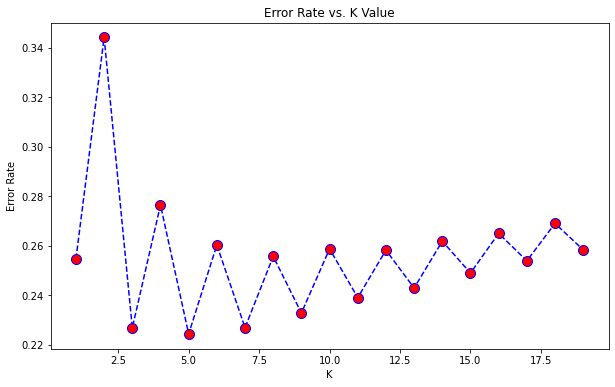

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_trainK, y_train_res)
pred = knn.predict(X_testK)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[  778  3398]
 [ 2836 20776]]


              precision    recall  f1-score   support

           0       0.22      0.19      0.20      4176
           1       0.86      0.88      0.87     23612

    accuracy                           0.78     27788
   macro avg       0.54      0.53      0.53     27788
weighted avg       0.76      0.78      0.77     27788



Accuracy: 0.7756585576507845
Precision: 0.859435757425333
Recall: 0.8798915805522616


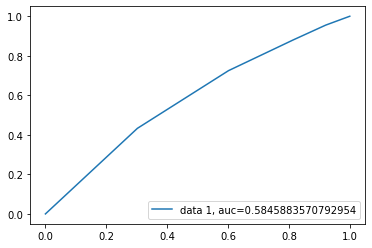

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

y_pred_proba = knn.predict_proba(X_testK)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Support Vector Machine

In [42]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_res,y_train_res)
predictions = model.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[    0  4176]
 [    0 23612]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4176
           1       0.85      1.00      0.92     23612

    accuracy                           0.85     27788
   macro avg       0.42      0.50      0.46     27788
weighted avg       0.72      0.85      0.78     27788



C:\Users\vihar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Grid Search**

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [47]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)


grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.854, total=58.8min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 58.8min remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=0.854, total=722.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 780.8min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.854, total=99.2min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.854, total=77.9min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.854, total=79.6min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=0.854, total=101.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.854, total=71.2min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.854, total=70.5min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.854, total=69.2min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 5542.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1],
                         'kernel': ['rbf']},
             verbose=3)

In [64]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [65]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [66]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[    0  4176]
 [    0 23612]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4176
           1       0.85      1.00      0.92     23612

    accuracy                           0.85     27788
   macro avg       0.42      0.50      0.46     27788
weighted avg       0.72      0.85      0.78     27788



C:\Users\vihar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
